Found 1081 images belonging to 4 classes.
Found 269 images belonging to 4 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 701s 20s/step - accuracy: 0.3734 - loss: 1.4136 - val_accuracy: 0.6543 - val_loss: 0.9139
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.5850 - loss: 0.9590 - val_accuracy: 0.6766 - val_loss: 0.8006
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.6303 - loss: 0.8610 - val_accuracy: 0.6877 - val_loss: 0.8130
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.6555 - loss: 0.8367 - val_accuracy: 0.6952 - val_loss: 0.7154
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.6538 - loss: 0.8213 - val_accuracy: 0.7026 - val_loss: 0.6982
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.6639 - loss: 0.7519 - val_accuracy: 0.7323 - val_loss: 0.6592
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.6777 - loss: 0.7466 - val_accuracy: 0.7286 - val_loss: 0.6345
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.6776 - loss: 0.7620 - val_accuracy: 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 667ms/step


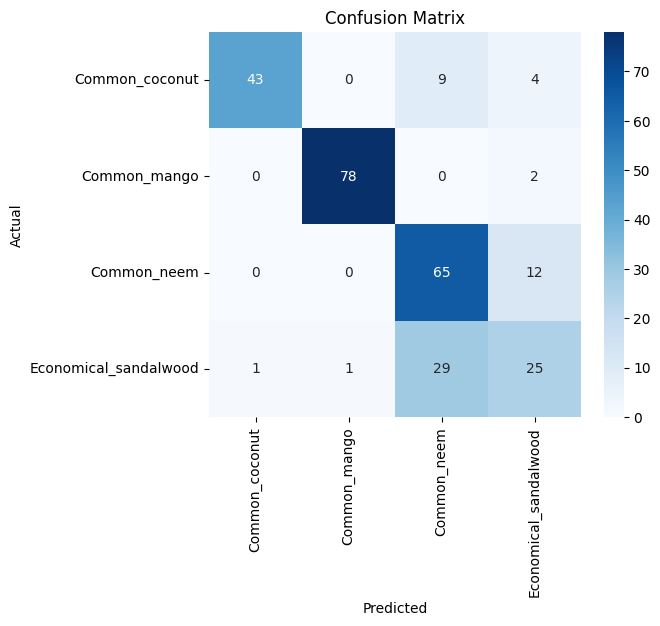

                       precision    recall  f1-score   support

       Common_coconut       0.98      0.77      0.86        56
         Common_mango       0.99      0.97      0.98        80
          Common_neem       0.63      0.84      0.72        77
Economical_sandalwood       0.58      0.45      0.51        56

             accuracy                           0.78       269
            macro avg       0.79      0.76      0.77       269
         weighted avg       0.80      0.78      0.78       269



Saving 126.jpg to 126.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


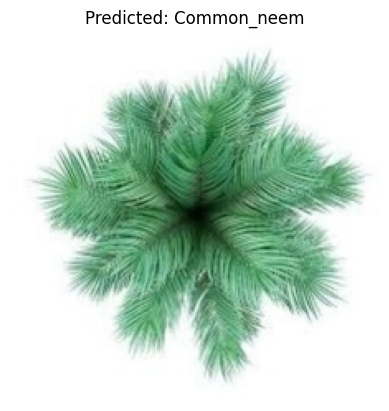

Predicted Class: Common_neem


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from google.colab import files
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Define dataset path
train_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/test'

# Data Preprocessing
img_size = (224, 224)
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Define Model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 20
history = model.fit(train_data, validation_data=test_data, epochs=epochs)

# Save the Model
model.save('/content/drive/MyDrive/Colab_Notebooks/Species_classifier_model/tree_species_resnet50.h5')

# Evaluate Model
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=train_data.class_indices.keys()))

# Function to classify a single image
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')


Saving 200.jpg to 200 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


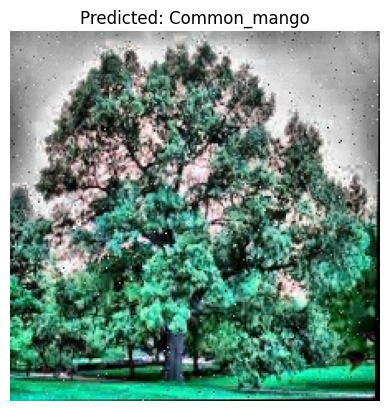

Predicted Class: Common_mango


In [8]:
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')